# Практическая работа №3: Частотный анализ полиномиальных приближений

Выполнили студенты гр. 0382 Азаров Максим и Шангичев Василий. Вариант №13.

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.

## Основные теоретические положения
__Пример вывода нерекурсивного фильтра сглаживания полиномом 4 степени для 15 точек__


Выходной сигнал: $P(t)=A+Bt+Ct^2+Dt^3+Et^4$   
 Построим приближение (в смысле МНК) полиномом второй степени по семи точкам:
$$F(A, B, C, D, E)=\sum^{7}_{k=-7}(s_k-(A+Bt+Ct^2+Dt^3+Et^4))^2 \Rightarrow min$$
После взятия частных производных получим систему линейных уравнений:
$$\begin{cases}\sum^{k=7}_{k=-7}s_k = 15A + 280C + 9352E \\
\sum^{k=7}_{k=-7}ts_k = 280B + 9352D \\
\sum^{k=7}_{k=-7}t^2s_k = 280A + 9352C + 369640E \\
\sum^{k=7}_{k=-7}t^3s_k = 9352B + 369640D
\sum^{k=7}_{k=-7}t^4s_k = 9352A + 369640C + 15814792E\end{cases}$$

После решения системы, получаем:
$$y_n=\frac{1}{46189}(2145s_{n-7}-2860s_{n-6}-2937s_{n-5}-165s_{n-4}+3755s_{n-3}+7500s_{n-2}+10125s_{n-1}+11063s_{n}+10125s_{n+1}+7500s_{n+2}+3755s_{n+3}-165s_{n+4}-2937s_{n+5}-2860s_{n+6}+2145s_{n+7})$$



__Нерекурсивный фильтр сглаживания прямой линией__:
* по $n$ точкам:
$$y_n = \frac{1}{n}\sum{s_i}$$

\\

\\
По аналогии выводим следующие формулы: \\

\\
__Нерекурсивный фильтра сглаживания полиномом второй степени__ :
* по 7 т. $$y_n = \frac{1}{21}(-2s_{n-3} +3s_{n-2}  +6s_{n-1} +7s_{n} +6s_{n+1} +3s_{n+2} -2s_{n+3})$$

* по 9 т. $$y_n = \frac{1}{231}(-21s_{n-4} +14s_{n-3}  +39s_{n-2} +54s_{n-1} +59s_{n} +54s_{n+1} +39s_{n+2} +14 s_{n+3} -21s_{n+4})$$

* по 11 т.  $$y_n = \frac{1}{429}(-36s_{n-5} +9s_{n-4} +44s_{n-3}  +69s_{n-2} +84s_{n-1} +89s_{n} +84s_{n+1} +69s_{n+2} +44 s_{n+3} +9s_{n+4} -36s_{n+5})$$

* по 13 т. $$y_n = \frac{1}{143}(-11s_{n-6} +0s_{n-5} +9s_{n-4} +16s_{n-3}  +21s_{n-2} +24s_{n-1} +25s_{n} +24s_{n+1} +21s_{n+2} + 16 s_{n+3} +9s_{n+4} +0s_{n+5} - 11s_{n+6})$$



__Нерекурсивный фильтра сглаживания по формуле Спенсера__ :
* по 15 т.  $$y_n = \frac{1}{320}(-3s_{n-7} -6s_{n-6} -5s_{n-5}  +3s_{n-4} +21s_{n-3} +46s_{n-2} +67s_{n-1} +74s_{n} +67 s_{n+1} +46s_{n+2}  + ...)$$

* по 21 т.  $$y_n = \frac{1}{350}( -s_{n-10} -3s_{n-9}  -5s_{n-8}-5s_{n-7} -2s_{n-6} +6s_{n-5}  +18s_{n-4} +33s_{n-3} +47s_{n-2} +57s_{n-1} +60s_{n} +57 s_{n+1}  + ...)$$


## Выполнение работы

In [ ]:
import math
import cmath
import numpy as np
import matplotlib.pyplot as plt

### 1. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.


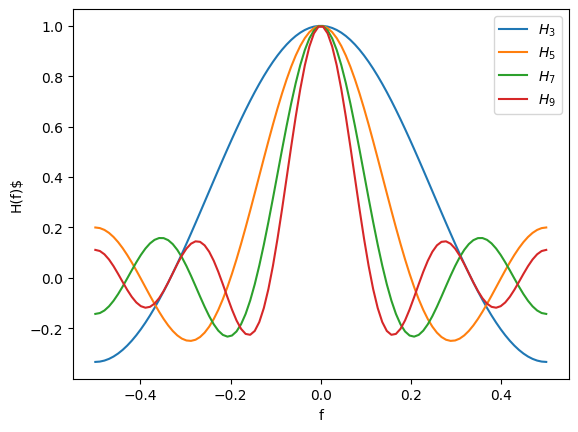

In [ ]:
s = lambda f, n: np.exp( 1j*(2*math.pi*f)*n)

def straight_smooth(n, f):
  answer = 0
  for i in range(-(n // 2), n // 2 + 1):
    answer += s(f, i)
  return answer / n


f = np.linspace( - 0.5,  0.5, 100)

for i in [3, 5, 7, 9]:
  plt.plot(f, straight_smooth(i, f), label=r'$H_' + str(i) + "$")

plt.xlabel('f')
plt.ylabel(r'H(f)$')
plt.legend()
plt.show()

**Интерпретация частотных свойств передаточных функций для различного количества точек**: \\
Как можем видеть все филтры без ослабления передают только сигнал постоянного уровня. Также можем заметить что подавление высоких частот довольно неравномерное.

При увеличении кол-ва точек по которым происходит зглаживание можем заметить ,что:
* Кривизна вблизи 0 увеличивается и ширина "колокола" уменьшается, что означает что снижается диапазон пропускная низких частот . Но при этом так как график резко падает , то фильтр более категорично относиться к филтрации частот .Либо в меньшей степени уменьшает сигнал , либо сильнее глушит.
* Частота колебаний передаточной функции увеличивается на средних и высоких частотах
* Амплитуда колебаний уменьшается

### 2. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Для каждого случая, зная $y_n$ найдем  $H(w) = \frac{y_n}{s_n} $ .
Затем $\tilde{H}(f) = H(2\pi f)$


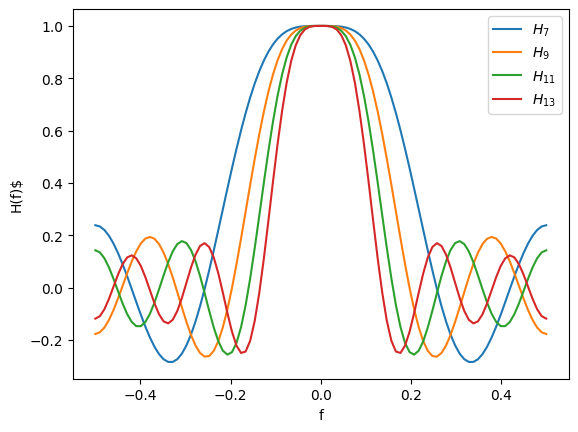

In [ ]:
s = lambda f, n: np.exp( 1j*(2*math.pi*f)*n)

H_7 = lambda f: (1/21) * (-2*s(f, -3) +3*s(f, -2) + 6*s(f, -1) + 7 * s(f, 0) \
                          + 6 * s(f,  1) + 3 * s(f, 2) -2 * s(f, 3))

H_9 = lambda f: (1/231) * (-21*s(f, -4) +14*s(f, -3) +39*s(f, -2) + 54*s(f, -1)  \
                           + 59 * s(f, 0) + 54 * s(f,  1) + 39 * s(f, 2) + 14 * s(f, 3) - 21 * s(f, 4))

H_11 = lambda f: (1/429) * (-36*s(f, -5) +9*s(f, -4) +44*s(f, -3) +69*s(f, -2) \
                            + 84*s(f, -1) + 89 * s(f, 0) + 84 * s(f,  1) + 69 * s(f, 2) + 44 * s(f, 3) +9 * s(f, 4)- 36 * s(f, 5))

H_13 = lambda f: (1/143) * (-11*s(f, -6) + 0*s(f, -5) +9*s(f, -4) +16*s(f, -3) \
                            +21*s(f, -2) + 24*s(f, -1) + 25 * s(f, 0) + 24 * s(f,  1) + 21 * s(f, 2) + 16 * s(f, 3) +9 * s(f, 4) + 0 * s(f, 5) - 11 * s(f, 6))



f = np.linspace( - 0.5,  0.5, 100)

plt.plot(f, H_7(f), label=r'$H_7$')
plt.plot(f, H_9(f), label=r'$H_9$')
plt.plot(f, H_11(f), label=r'$H_{11}$')
plt.plot(f, H_13(f), label=r'$H_{13}$')
plt.xlabel('f')
plt.ylabel(r'H(f)$')
plt.legend()
plt.show()


**Интерпретация частотных свойств передаточных функций для различного количества точек**: \\
Как можем видеть все филтры без ослабления передают только сигнал постоянного уровня. Также можем заметить что подавление высоких частот довольно неравномерное.

При увеличении кол-ва точек по которым происходит зглаживание можем заметить ,что:
* Кривизна вблизи 0 увеличивается и ширина "колокола" уменьшается, что означает что снижается диапазон пропускная низких частот . Но при этом так как график резко падает , то фильтр более категорично относиться к филтрации частот .Либо в меньшей степени уменьшает сигнал , либо сильнее глушит.
* Частота колебаний передаточной функции увеличивается на средних и высоких частотах
* Амплитуда колебаний уменьшается

### 3. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

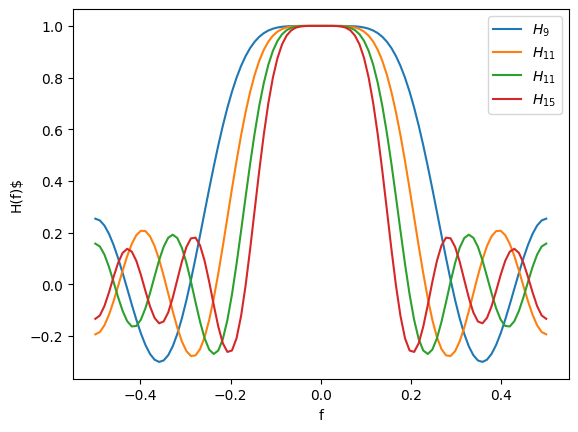

In [ ]:
import numpy as np

s = lambda f, n: np.exp( 1j*(2*math.pi*f)*n)

def H_9(f):
  result = 0
  k = [15, -55, 30, 135, 179, 135, 30, -55, 15]
  for i in range(-4, 5):
    result += k[i+4] * s(f, i)
  return result / 429


def H_11(f):
  result = 0
  k = [18, -45, -10, 60, 120, 143, 120, 60, -10, -45, 18]
  for i in range(-5, 6):
    result += k[i+5] * s(f, i)
  return result / 429

def H_13(f):
  result = 0
  k = [110, -198, -135, 110, 390, 600, 677, 600, 390, 110, -135, -198, 110]
  for i in range(-6, 7):
    result += k[i+6] * s(f, i)
  return result / 2431

def H_15(f):
  result = 0
  k = [2145, -2860, -2937, -165, 3755, 7500, 10125, 11063, 10125, 7500, 3755, -165, -2937, -2860, 2145]
  for i in range(-7, 8):
    result += k[i+7] * s(f, i)
  return result / 46189





f = np.linspace( - 0.5,  0.5, 100)

plt.plot(f, H_9(f), label=r'$H_9$')
plt.plot(f, H_11(f), label=r'$H_{11}$')
plt.plot(f, H_13(f), label=r'$H_{11}$')
plt.plot(f, H_15(f), label=r'$H_{15}$')
plt.xlabel('f')
plt.ylabel(r'H(f)$')
plt.legend()
plt.show()

Так как графики схожи с предыдущими пунктами , то **интерпретация частотных свойств передаточный функций для различного количества точек** аналогична пунктам 1-2.

### 4. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам. Построить графики $\tilde H (f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Для каждого случая, зная $y_n$ найдем  $H(w) = \frac{y_n}{s_n} $ .
Затем $\tilde{H}(f) = H(2\pi f)$


* по 15 т.  $$y_n = \frac{1}{320}(-3s_{n-7} -6s_{n-6} -5s_{n-5}  +3s_{n-4} +21s_{n-3} +46s_{n-2} +67s_{n-1} +74s_{n} +67 s_{n+1} +46s_{n+2}  + ...)$$

* по 21 т.  $$y_n = \frac{1}{350}( -s_{n-10} -3s_{n-9}  -5s_{n-8}-5s_{n-7} -2s_{n-6} +6s_{n-5}  +18s_{n-4} +33s_{n-3} +47s_{n-2} +57s_{n-1} +60s_{n} +57 s_{n+1}  + ...)$$


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


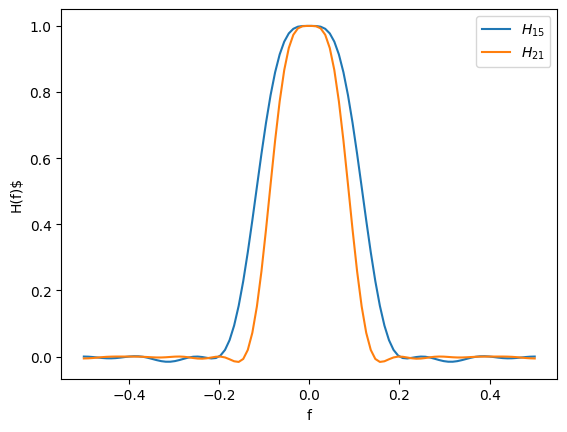

In [ ]:
s = lambda f, n: np.exp( 1j*(2*math.pi*f)*n)


def H_15(f):
    norm = 320
    coef = [-3, -6, -5, 3, 21, 46 ,67 ,74]
    full_coef = coef + coef[-2::-1]

    sum = 0

    for i in range(len(full_coef)):
        #print(full_coef[i],-(len(coef)-1)+i)
        sum = sum + full_coef[i] * s(f, -(len(coef)-1)+i)

    return sum/norm

def H_21(f):
    norm = 350
    coef = [-1, -3, -5, -5, -2, 6 ,18 ,33, 47, 57, 60 ]
    full_coef = coef + coef[-2::-1]

    sum = 0

    for i in range(len(full_coef)):
        #print(full_coef[i],-(len(coef)-1)+i)
        sum = sum + full_coef[i] * s(f, -(len(coef)-1)+i)

    return sum/norm



f = np.linspace( - 0.5,  0.5, 100)



plt.plot(f, H_15(f), label=r'$H_{15}$')
plt.plot(f, H_21(f), label=r'$H_{21}$')
plt.xlabel('f')
plt.ylabel(r'H(f)$')
plt.legend()
plt.show()

**Интерпретация частотных свойств передаточных функций для различного количества точек**: \\
Как можем видеть все филтры без ослабления передают только сигнал постоянного уровня. Но в отличии от предыдущих фильтров подавление высоких частот довольно **равномерно**.

При увеличении кол-ва точек по которым происходит зглаживание можем заметить ,что:
* Ширина области для которой $H(f)>0$ сужается, что говорит о том что все меньше пропускается  диапопазон начиная с низких частот.   
* Колебания имеют меньшую амплитуду.
* Кривизна вблизи 0 увеличивается что означает что фильтр более категорично относиться к филтрации частот .Либо в меньшей степени уменьшает сигнал , либо сильнее глушит.



### 5. Построить графики из предыдущих пунктов в логарифмической шкале (Дб). Объясните, чем отличаются данные графики от полученных ранее и объясните их смысл.

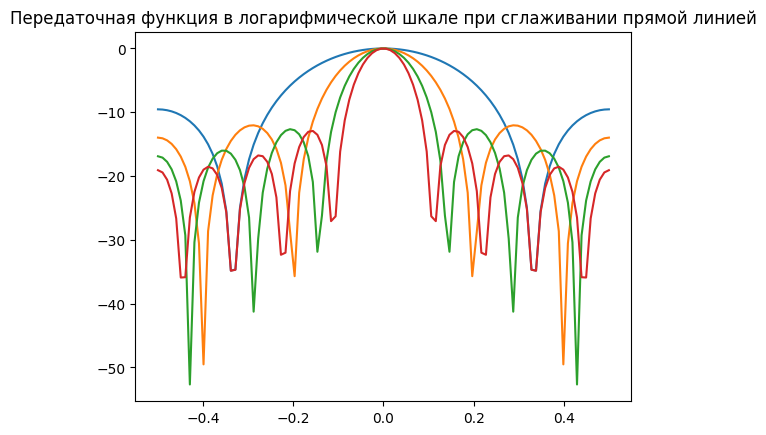

In [ ]:
f = np.linspace( - 0.5,  0.5, 100)
straight_smooth = np.vectorize(straight_smooth)
plt.title("Передаточная функция в логарифмической шкале при сглаживании прямой линией")
plt.plot(f, 20*np.log10(np.abs(straight_smooth(3, f))), label='n=3')
plt.plot(f, 20*np.log10(np.abs(straight_smooth(5, f))), label='n=5')
plt.plot(f, 20*np.log10(np.abs(straight_smooth(7, f))), label='n=7')
plt.plot(f, 20*np.log10(np.abs(straight_smooth(9, f))), label='n=9')
plt.legend()
plt.show()


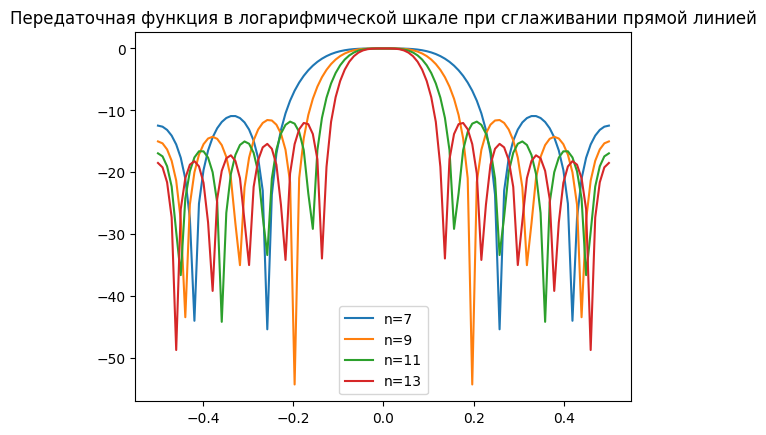

In [ ]:
H_7 = lambda f: (1/21) * (-2*s(f, -3) +3*s(f, -2) + 6*s(f, -1) + 7 * s(f, 0) \
                          + 6 * s(f,  1) + 3 * s(f, 2) -2 * s(f, 3))

H_9 = lambda f: (1/231) * (-21*s(f, -4) +14*s(f, -3) +39*s(f, -2) + 54*s(f, -1)  \
                           + 59 * s(f, 0) + 54 * s(f,  1) + 39 * s(f, 2) + 14 * s(f, 3) - 21 * s(f, 4))

H_11 = lambda f: (1/429) * (-36*s(f, -5) +9*s(f, -4) +44*s(f, -3) +69*s(f, -2) \
                            + 84*s(f, -1) + 89 * s(f, 0) + 84 * s(f,  1) + 69 * s(f, 2) + 44 * s(f, 3) +9 * s(f, 4)- 36 * s(f, 5))

H_13 = lambda f: (1/143) * (-11*s(f, -6) + 0*s(f, -5) +9*s(f, -4) +16*s(f, -3) \
                            +21*s(f, -2) + 24*s(f, -1) + 25 * s(f, 0) + 24 * s(f,  1) + 21 * s(f, 2) + 16 * s(f, 3) +9 * s(f, 4) + 0 * s(f, 5) - 11 * s(f, 6))

H_7 = np.vectorize(H_7)
H_9 = np.vectorize(H_9)
H_11 = np.vectorize(H_11)
H_13 = np.vectorize(H_13)

plt.title("Передаточная функция в логарифмической шкале при сглаживании полиномом 2-й степени")
plt.plot(f, 20*np.log10(np.abs(H_7(f))), label='n=7')
plt.plot(f, 20*np.log10(np.abs(H_9(f))), label='n=9')
plt.plot(f, 20*np.log10(np.abs(H_11(f))), label='n=11')
plt.plot(f, 20*np.log10(np.abs(H_13(f))), label='n=13')
plt.legend()
plt.show()





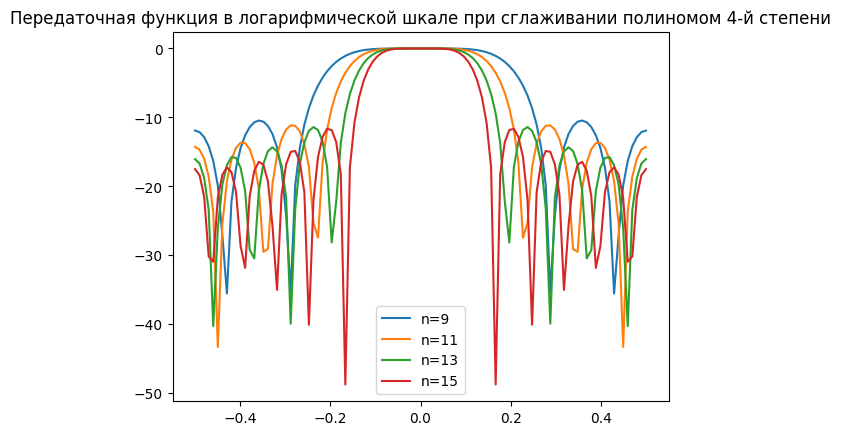

In [ ]:
def H_9(f):
  result = 0
  k = [15, -55, 30, 135, 179, 135, 30, -55, 15]
  for i in range(-4, 5):
    result += k[i+4] * s(f, i)
  return result / 429


def H_11(f):
  result = 0
  k = [18, -45, -10, 60, 120, 143, 120, 60, -10, -45, 18]
  for i in range(-5, 6):
    result += k[i+5] * s(f, i)
  return result / 429

def H_13(f):
  result = 0
  k = [110, -198, -135, 110, 390, 600, 677, 600, 390, 110, -135, -198, 110]
  for i in range(-6, 7):
    result += k[i+6] * s(f, i)
  return result / 2431

def H_15(f):
  result = 0
  k = [2145, -2860, -2937, -165, 3755, 7500, 10125, 11063, 10125, 7500, 3755, -165, -2937, -2860, 2145]
  for i in range(-7, 8):
    result += k[i+7] * s(f, i)
  return result / 46189

H_9 = np.vectorize(H_9)
H_11 = np.vectorize(H_11)
H_13 = np.vectorize(H_13)
H_15 = np.vectorize(H_15)

plt.title("Передаточная функция в логарифмической шкале при сглаживании полиномом 4-й степени")
plt.plot(f, 20*np.log10(np.abs(H_9(f))), label='n=9')
plt.plot(f, 20*np.log10(np.abs(H_11(f))), label='n=11')
plt.plot(f, 20*np.log10(np.abs(H_13(f))), label='n=13')
plt.plot(f, 20*np.log10(np.abs(H_15(f))), label='n=15')
plt.legend()
plt.show()



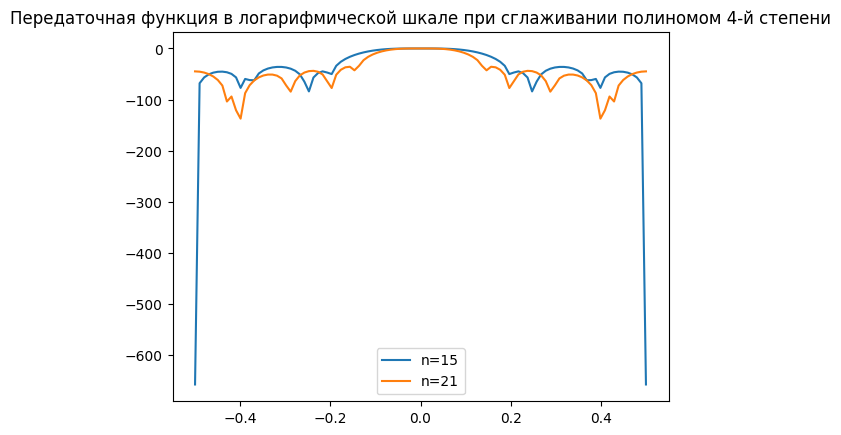

In [ ]:
def H_15(f):
    norm = 320
    coef = [-3, -6, -5, 3, 21, 46 ,67 ,74]
    full_coef = coef + coef[-2::-1]

    sum = 0

    for i in range(len(full_coef)):
        #print(full_coef[i],-(len(coef)-1)+i)
        sum = sum + full_coef[i] * s(f, -(len(coef)-1)+i)

    return sum/norm

def H_21(f):
    norm = 350
    coef = [-1, -3, -5, -5, -2, 6 ,18 ,33, 47, 57, 60 ]
    full_coef = coef + coef[-2::-1]

    sum = 0

    for i in range(len(full_coef)):
        #print(full_coef[i],-(len(coef)-1)+i)
        sum = sum + full_coef[i] * s(f, -(len(coef)-1)+i)

    return sum/norm

H_15 = np.vectorize(H_15)
H_21 = np.vectorize(H_21)

plt.title("Передаточная функция в логарифмической шкале при сглаживании по формулам Спенсера")
plt.plot(f, 20*np.log10(np.abs(H_15(f))), label='n=15')
plt.plot(f, 20*np.log10(np.abs(H_21(f))), label='n=21')
plt.legend()
plt.show()



### 6. Провести сопоставительный анализ свойств передаточных функций, полученных при выполнении п. 1–4.

Можно заметить что с увеличением степени полинома сглаживания
* Увеличиваетс ширина "колокола" , что говорит о том что увеличивается окно низких частот , которые пропускаются  без искажения или с меньшим искажением  .
* Резкость спуска с "колокола" увеличивается , что говорит о более четкой границе фильтрации частот.

\\
Фильтра по формулам Спенсера отличается от  фильтров на основе полиномов следующим:
* В отличии от  фильтров на основе полиномов подавление  высоких частот в фильтре  довольно равномерно .
* Но при этом окно пропускающих низких частот заметно меньше чем  в  фильтрах на основе полиномов .
* Имеет еще более резкий спуск,  что говорит о более четкой границе фильтрации частот.

## Выводы


В ходе выполнения работы  были выведены формулы **передаточной функциии** для фильтров , соответствующих сглаживанию прямой , полиномом второй степени , полиномом четвертой степени и по формулам Спенсера , по разному количеству точек.

\\
Для каждого случая были проинтерпретированы частотные свойства передаточных функций для различного количества точек . В результате которых было выясненно , что независимо от типа филтра , увеличение точек способствует :
* Приводит к снижению диапазона пропускнания низких частот . При  фильтр более категорично относиться к филтрации частот .Либо в меньшей степени уменьшает сигнал , либо сильнее глушит.
* Частота колебаний передаточной функции увеличивается на средних и высоких частотах
* Амплитуда колебаний на высоких частотах уменьшается

\\
Также был произведен сравнительный анализ между филтрами на основе полиномов и на сонове формул Спенсера , в свизи с чем были сделаны следующие выводы:
* Фильтр на основе формул Спенсера лучше и более равномерно  подавляет   высокие частоты  .
* При этом диапазон пропускающих низких частот заметно меньше чем  в  фильтрах на основе полиномов .

\\
По итогу в работе был проведен анализ частотных характеристик известных формул полиномиального сглаживания временных рядов и сделаны соответствующие выводы.